# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Alunos**: Felipe de Oliveira Fernandes e Gustavo Ribeiro da Fonseca Santos 

**Matriculas:** 202010764 e 201921049

**Turma**: 10A, 14A

Link do repositório GitHub: https://github.com/GustavoRFS/cpa-efc1

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 26 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações e Variáveis globais

In [228]:
import numpy as np
import matplotlib.pyplot as plt
import time

global_1=0

# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


In [229]:
def insertionSort(arranjo):
  tempoInicial = time.time()
  comparacoes = 0
  for j in range(1, len(arranjo)):
    comparacoes += 1
    chave = arranjo[j]
    i = j -1
    while i >= 0 and arranjo[i] > chave:
      comparacoes += 1
      arranjo[i + 1] = arranjo[i]
      i -= 1
    comparacoes += 1
    arranjo[i + 1] = chave
  
  comparacoes += 1
  tempoTotal = time.time() - tempoInicial
  return (arranjo,comparacoes,tempoTotal)

##  Merge Sort


In [230]:
def merge(arranjo, p, q, r):
  comparacoes = 0
  n1 = q - p + 1 
  n2 = r - q
  l = [0] * n1
  r = [0] * n2

  for i in range(0,n1):
    comparacoes += 1
    l[i] = arranjo[p + i]
  comparacoes += 1

  for j in range(0,n2):
    comparacoes += 1
    r[j] = arranjo[q + 1 + j]
  comparacoes += 1

  i, j = 0, 0
  k = p
  while i < n1 and j < n2:
    comparacoes += 1
    if l[i] <= r[j]:
      arranjo[k] = l[i]
      i += 1
    else:
      arranjo[k] = r[j]
      j += 1
    k += 1
    comparacoes += 1
  comparacoes += 1
  while i < n1:
    comparacoes += 1
    arranjo[k] = l[i]
    i += 1
    k += 1
  comparacoes += 1
  while j < n2:
    comparacoes += 1
    arranjo[k] = r[j]
    j += 1
    k += 1
  comparacoes += 1

  return comparacoes

In [231]:
def mergeSort(arranjo,p,r):
  comparacoes = 0
  if p < r:
    q = (p + r) // 2
    comparacoes += mergeSort(arranjo,p,q)
    comparacoes += mergeSort(arranjo,q + 1,r)
    comparacoes += merge(arranjo,p,q,r)
  comparacoes += 1

  return comparacoes

In [232]:
def mergeSortA(arranjo):
  tempoInicial = time.time()
  comparacoes = 0
  comparacoes += mergeSort(arranjo,0,len(arranjo) -1)

  tempoTotal = time.time() - tempoInicial
  return (arranjo, comparacoes,tempoTotal)

##  Selection Sort


In [233]:
def selectionSort(arranjo):
  tempoInicial = time.time()
  comparacoes = 0
  for i in range(0,len(arranjo)):
    comparacoes += 1
    menor = arranjo[i]
    posMenor = i
    for j in range(i,len(arranjo)):
      comparacoes += 1
      if arranjo[j] < menor:
        menor = arranjo[j]
        posMenor = j
      comparacoes += 1
    comparacoes += 1
    arranjo[i], arranjo[posMenor] = (arranjo[posMenor],arranjo[i])
  comparacoes += 1

  tempoTotal = time.time() - tempoInicial
  return (arranjo,comparacoes,tempoTotal)

##  Bubble Sort


In [234]:
def bubbleSort(arranjo):
  tempoInicial = time.time()
  comparacoes = 0
  alterado = True
  for i in range(0, len(arranjo) - 1):
    comparacoes += 1
    if alterado:
      alterado = False
      for j in range(0, len(arranjo) - i - 1):
        comparacoes += 1
        if arranjo[j] > arranjo[j + 1]:
          arranjo[j], arranjo[j + 1] = arranjo[j + 1], arranjo[j]
          alterado = True
        comparacoes += 1
      comparacoes += 1
    comparacoes += 1
  comparacoes += 1

  tempoTotal =  time.time() - tempoInicial
  return (arranjo,comparacoes,tempoTotal)


## Heap Sort

In [235]:
def max_heapify(arranjo, n, i):
  comparacoes = 0
  maior = i 
  l = 2 * i + 1  
  r = 2 * i + 2  
  
  comparacoes += 1
  if l < n and arranjo[i] < arranjo[l]: 
    maior = l 
  
  comparacoes += 1
  if r < n and arranjo[maior] < arranjo[r]: 
    maior = r 
      
  comparacoes += 1
  if maior != i: 
    arranjo[i],arranjo[maior] = arranjo[maior],arranjo[i] 
    comparacoes += max_heapify(arranjo, n, maior)

  return comparacoes

In [236]:
def build_max_heap(arranjo, tamanho_heap):
  comparacoes = 0
  for i in range(tamanho_heap//2 - 1, - 1, -1):
    comparacoes += 1
    comparacoes += max_heapify(arranjo, tamanho_heap, i)
  comparacoes += 1
  return comparacoes
    

In [237]:
def heapSort(arranjo):
  tempoInicial = time.time()
  comparacoes = 0
  n = len(arranjo) 
  comparacoes +=  build_max_heap(arranjo, n)
  
  for i in range(n-1, 0, -1):
      comparacoes += 1
      arranjo[i], arranjo[0] = arranjo[0], arranjo[i] 
      comparacoes += max_heapify(arranjo, i, 0)
  comparacoes += 1

  tempoTotal =  time.time() - tempoInicial
  return (arranjo,comparacoes,tempoTotal)

## Quick Sort

> pivo = *A[A-comprimento]*

In [238]:
def quick_sort(arranjo, inicio, fim):
  comparacoes = 0

  comparacoes += 1
  if inicio > fim:
    return comparacoes

  anterior = inicio
  posterior = fim
  pivo = arranjo[-1]

  while anterior < posterior:
    comparacoes += 1
    while anterior < posterior and arranjo[posterior] > pivo:
      comparacoes += 1
      posterior = posterior - 1
    comparacoes += 1

    comparacoes += 1
    if anterior < posterior:
      arranjo[anterior] = arranjo[posterior]
      anterior = anterior + 1

    while anterior < posterior and arranjo[anterior] <= pivo:
      comparacoes += 1
      anterior = anterior + 1
    comparacoes += 1
    
    comparacoes += 1
    if anterior < posterior:
      arranjo[posterior] = arranjo[anterior]
      posterior = posterior - 1

    arranjo[anterior] = pivo

  comparacoes += quick_sort(arranjo, inicio, anterior - 1)
  comparacoes += quick_sort(arranjo, anterior + 1, fim)

  return comparacoes

In [239]:
def quickSortA(arranjo):
  tempoInicial = time.time()
  comparacoes = quick_sort(arranjo,0, len(arranjo) - 1)

  tempoTotal = time.time() - tempoInicial
  return (comparacoes,tempoTotal)

# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realzizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





## Questão 1 - A - Insertion Sort

O algoritmo Insertion Sort tem como pior caso quando o arranjo está ordenado em ordem decrescente enquanto o melhor caso é quando o arranjo já vem ordenado

### Geral

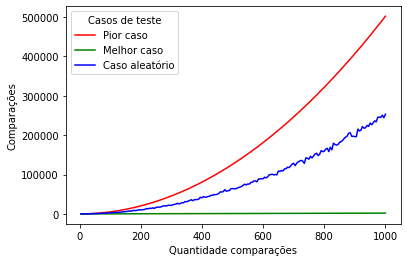

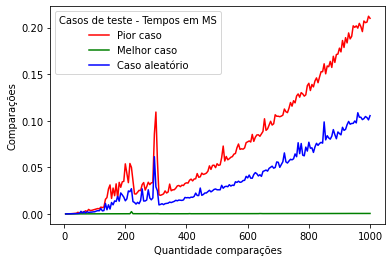

In [240]:
i = 5
melhoresCasosInsertionSort = {}
melhoresCasosInsertionSortTempo = {}
pioresCasosInsertionSort = {}
pioresCasosInsertionSortTempo = {}
casosAleatoriosInsertionSort = {}
casosAleatoriosInsertionSortTempo = {}
while i <= 1000:
  arranjo = np.arange(i)
  arranjoAleatorio = np.random.randint(0,100000,i)
  _,melhoresCasosInsertionSort[i],melhoresCasosInsertionSortTempo[i] = insertionSort(arranjo)
  _,pioresCasosInsertionSort[i],pioresCasosInsertionSortTempo[i] = insertionSort(arranjo[::-1])
  _,casosAleatoriosInsertionSort[i],casosAleatoriosInsertionSortTempo[i] = insertionSort(arranjoAleatorio)

  i += 5

plt.plot(list(pioresCasosInsertionSort.keys()), list(pioresCasosInsertionSort.values()),label='Pior caso',color='red')
plt.plot(list(melhoresCasosInsertionSort.keys()), list(melhoresCasosInsertionSort.values()),label='Melhor caso',color='green')
plt.plot(list(casosAleatoriosInsertionSort.keys()), list(casosAleatoriosInsertionSort.values()), label='Caso aleatório',color='blue')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(pioresCasosInsertionSortTempo.keys()), list(pioresCasosInsertionSortTempo.values()),label='Pior caso',color='red')
plt.plot(list(melhoresCasosInsertionSortTempo.keys()), list(melhoresCasosInsertionSortTempo.values()),label='Melhor caso',color='green')
plt.plot(list(casosAleatoriosInsertionSortTempo.keys()), list(casosAleatoriosInsertionSortTempo.values()), label='Caso aleatório',color='blue')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempos em MS")
plt.show()

### Melhor Caso

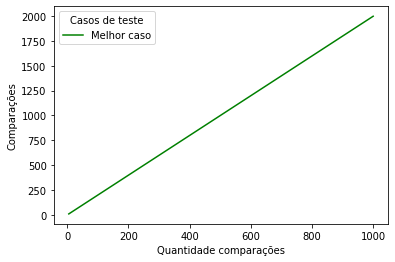

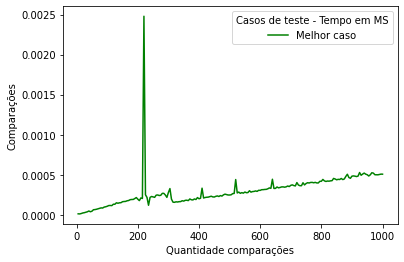

In [241]:
plt.plot(list(melhoresCasosInsertionSort.keys()), list(melhoresCasosInsertionSort.values()),label='Melhor caso',color='green')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(melhoresCasosInsertionSortTempo.keys()), list(melhoresCasosInsertionSortTempo.values()),label='Melhor caso',color='green')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

### Pior caso

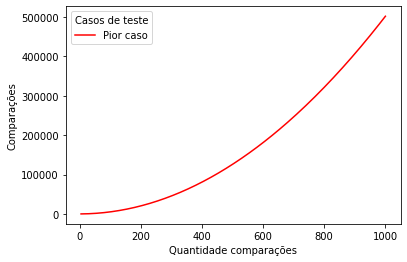

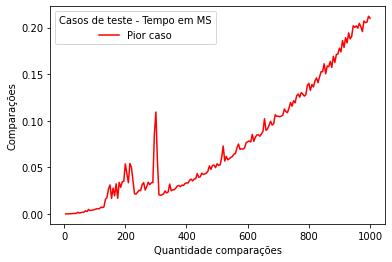

In [242]:
plt.plot(list(pioresCasosInsertionSort.keys()), list(pioresCasosInsertionSort.values()),label='Pior caso',color='red')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(pioresCasosInsertionSortTempo.keys()), list(pioresCasosInsertionSortTempo.values()),label='Pior caso',color='red')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

### Caso aleatório

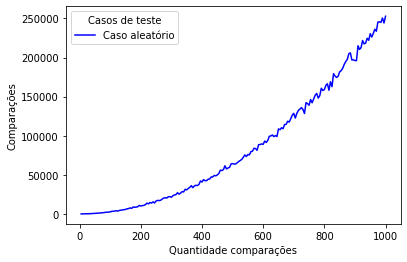

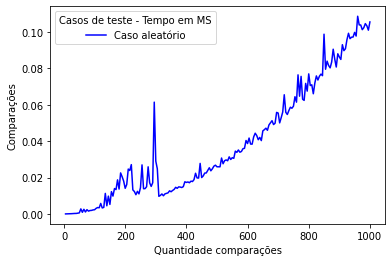

In [243]:
plt.plot(list(casosAleatoriosInsertionSort.keys()), list(casosAleatoriosInsertionSort.values()), label='Caso aleatório',color='blue')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(casosAleatoriosInsertionSortTempo.keys()), list(casosAleatoriosInsertionSortTempo.values()), label='Caso aleatório',color='blue')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

## Questão 1 - A - Merge Sort

O algoritmo Merge Sort não tem um pior ou melhor caso já que as comparações independem da configuração do arranjo

### Geral

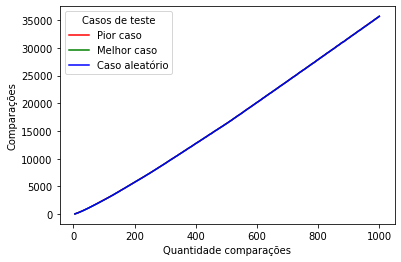

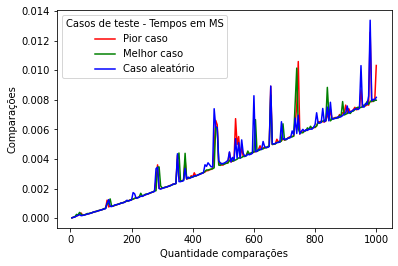

In [244]:
i = 5
melhoresCasosMergeSort = {}
melhoresCasosMergeSortTempo = {}
pioresCasosMergeSort = {}
pioresCasosMergeSortTempo = {}
casosAleatoriosMergeSort = {}
casosAleatoriosMergeSortTempo = {}

while i <= 1000:
  arranjo = np.arange(i)
  arranjoAleatorio = np.random.randint(0,100000,i)
  _,melhoresCasosMergeSort[i],melhoresCasosMergeSortTempo[i] = mergeSortA(np.random.randint(0,100000,i))
  _,pioresCasosMergeSort[i],pioresCasosMergeSortTempo[i] = mergeSortA(np.random.randint(0,100000,i))
  _,casosAleatoriosMergeSort[i],casosAleatoriosMergeSortTempo[i] = mergeSortA(arranjoAleatorio)
  i += 5

plt.plot(list(pioresCasosMergeSort.keys()), list(pioresCasosMergeSort.values()),label='Pior caso',color='red')
plt.plot(list(melhoresCasosMergeSort.keys()), list(melhoresCasosMergeSort.values()),label='Melhor caso',color='green')
plt.plot(list(casosAleatoriosMergeSort.keys()), list(casosAleatoriosMergeSort.values()), label='Caso aleatório',color='blue')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(pioresCasosMergeSortTempo.keys()), list(pioresCasosMergeSortTempo.values()),label='Pior caso',color='red')
plt.plot(list(melhoresCasosMergeSortTempo.keys()), list(melhoresCasosMergeSortTempo.values()),label='Melhor caso',color='green')
plt.plot(list(casosAleatoriosMergeSortTempo.keys()), list(casosAleatoriosMergeSortTempo.values()), label='Caso aleatório',color='blue')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempos em MS")
plt.show()

### Melhor Caso

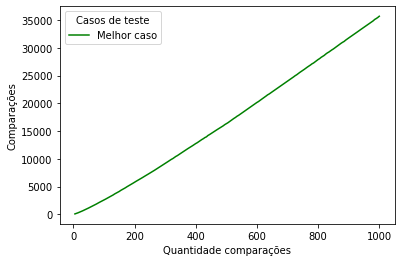

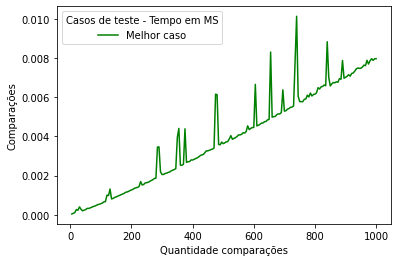

In [245]:
plt.plot(list(melhoresCasosMergeSort.keys()), list(melhoresCasosMergeSort.values()),label='Melhor caso',color='green')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(melhoresCasosMergeSortTempo.keys()), list(melhoresCasosMergeSortTempo.values()),label='Melhor caso',color='green')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

### Pior caso

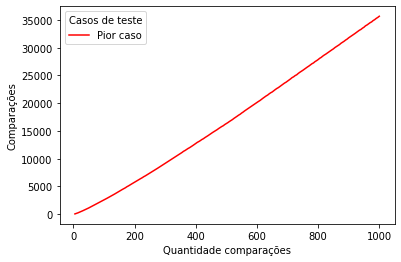

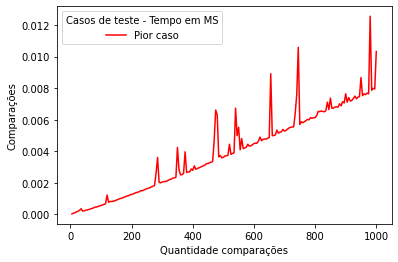

In [246]:
plt.plot(list(pioresCasosMergeSort.keys()), list(pioresCasosMergeSort.values()),label='Pior caso',color='red')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(pioresCasosMergeSortTempo.keys()), list(pioresCasosMergeSortTempo.values()),label='Pior caso',color='red')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

### Caso aleatório

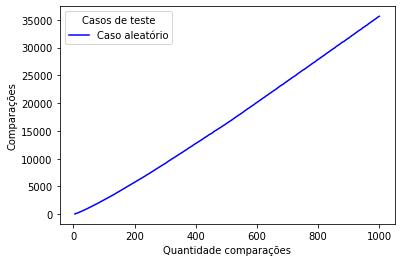

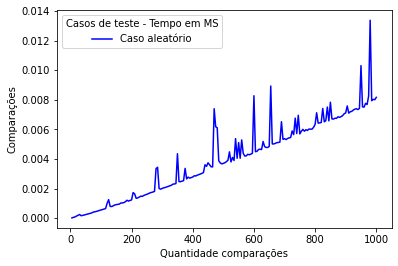

In [247]:
plt.plot(list(casosAleatoriosMergeSort.keys()), list(casosAleatoriosMergeSort.values()), label='Caso aleatório',color='blue')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(casosAleatoriosMergeSortTempo.keys()), list(casosAleatoriosMergeSortTempo.values()), label='Caso aleatório',color='blue')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

## Questão 1 - A -  Selection Sort

O algoritmo Selection Sort sempre executará a mesma coisa, independente da entrada, logo todo caso está no melhor e pior caso

### Geral

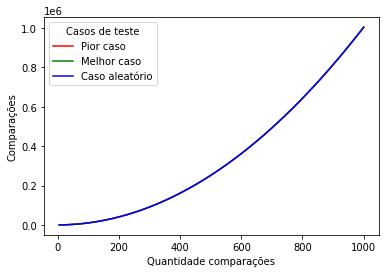

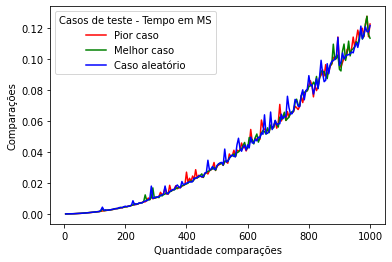

In [248]:
i = 5
melhoresCasosSelectionSort = {}
melhoresCasosSelectionSortTempo = {}
pioresCasosSelectionSort = {}
pioresCasosSelectionSortTempo = {}
casosAleatoriosSelectionSort = {}
casosAleatoriosSelectionSortTempo = {}

while i <= 1000:
  arranjo = np.arange(i)
  arranjoAleatorio = np.random.randint(0,100000,i)
  _,melhoresCasosSelectionSort[i],melhoresCasosSelectionSortTempo[i] = selectionSort(arranjo)
  _,pioresCasosSelectionSort[i],pioresCasosSelectionSortTempo[i] = selectionSort(arranjo)
  _,casosAleatoriosSelectionSort[i],casosAleatoriosSelectionSortTempo[i] = selectionSort(arranjoAleatorio)
  i += 5

plt.plot(list(pioresCasosSelectionSort.keys()), list(pioresCasosSelectionSort.values()),label='Pior caso',color='red')
plt.plot(list(melhoresCasosSelectionSort.keys()), list(melhoresCasosSelectionSort.values()),label='Melhor caso',color='green')
plt.plot(list(casosAleatoriosSelectionSort.keys()), list(casosAleatoriosSelectionSort.values()), label='Caso aleatório',color='blue')

plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(pioresCasosSelectionSortTempo.keys()), list(pioresCasosSelectionSortTempo.values()),label='Pior caso',color='red')
plt.plot(list(melhoresCasosSelectionSortTempo.keys()), list(melhoresCasosSelectionSortTempo.values()),label='Melhor caso',color='green')
plt.plot(list(casosAleatoriosSelectionSortTempo.keys()), list(casosAleatoriosSelectionSortTempo.values()), label='Caso aleatório',color='blue')

plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

### Melhor Caso

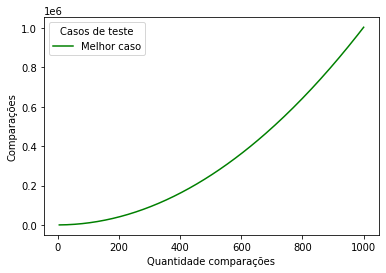

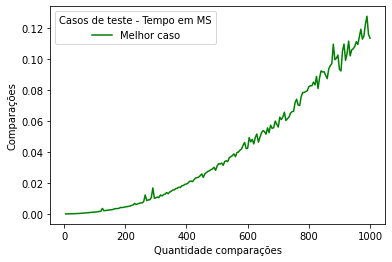

In [249]:
plt.plot(list(melhoresCasosSelectionSort.keys()), list(melhoresCasosSelectionSort.values()),label='Melhor caso',color='green')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(melhoresCasosSelectionSortTempo.keys()), list(melhoresCasosSelectionSortTempo.values()),label='Melhor caso',color='green')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

### Pior caso

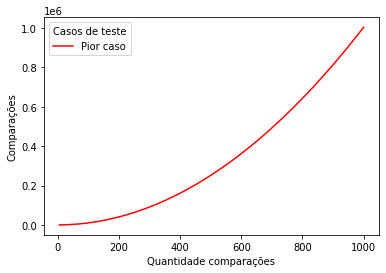

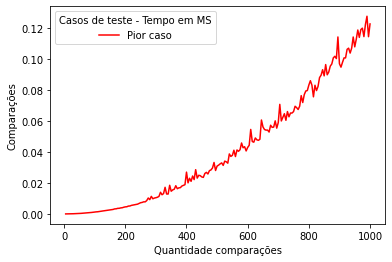

In [250]:
plt.plot(list(pioresCasosSelectionSort.keys()), list(pioresCasosSelectionSort.values()),label='Pior caso',color='red')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(pioresCasosSelectionSortTempo.keys()), list(pioresCasosSelectionSortTempo.values()),label='Pior caso',color='red')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

### Caso aleatório

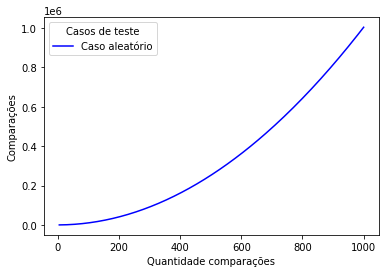

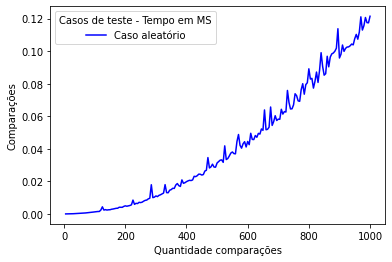

In [251]:
plt.plot(list(casosAleatoriosSelectionSort.keys()), list(casosAleatoriosSelectionSort.values()), label='Caso aleatório',color='blue')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(casosAleatoriosSelectionSortTempo.keys()), list(casosAleatoriosSelectionSortTempo.values()), label='Caso aleatório',color='blue')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

## Questão 1 - A - Bubble Sort

O algoritmo Bubble Sort tem como melhor caso o arranjo ordenado enquanto tem como pior caso o arranjo em ordem ordem decrescente

### Geral

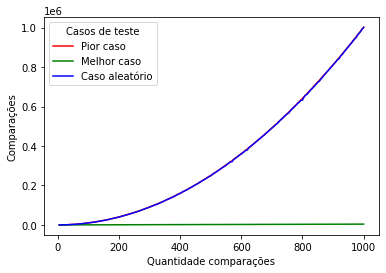

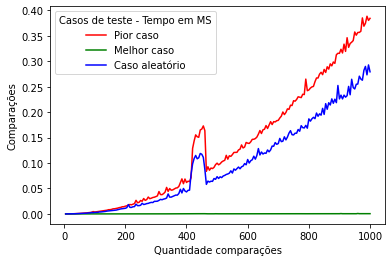

In [252]:
i = 5
melhoresCasosBubbleSort = {}
melhoresCasosBubbleSortTempo = {}
pioresCasosBubbleSort = {}
pioresCasosBubbleSortTempo = {}
casosAleatoriosBubbleSort = {}
casosAleatoriosBubbleSortTempo = {}
while i <= 1000:
  arranjo = np.arange(i)
  arranjoAleatorio = np.random.randint(0,100000,i)
  _,melhoresCasosBubbleSort[i],melhoresCasosBubbleSortTempo[i] = bubbleSort(arranjo)
  _,pioresCasosBubbleSort[i],pioresCasosBubbleSortTempo[i] = bubbleSort(arranjo[::-1])
  _,casosAleatoriosBubbleSort[i],casosAleatoriosBubbleSortTempo[i] = bubbleSort(arranjoAleatorio)
  i += 5

plt.plot(list(pioresCasosBubbleSort.keys()), list(pioresCasosBubbleSort.values()),label='Pior caso',color='red')
plt.plot(list(melhoresCasosBubbleSort.keys()), list(melhoresCasosBubbleSort.values()),label='Melhor caso',color='green')
plt.plot(list(casosAleatoriosBubbleSort.keys()), list(casosAleatoriosBubbleSort.values()), label='Caso aleatório',color='blue')

plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(pioresCasosBubbleSortTempo.keys()), list(pioresCasosBubbleSortTempo.values()),label='Pior caso',color='red')
plt.plot(list(melhoresCasosBubbleSortTempo.keys()), list(melhoresCasosBubbleSortTempo.values()),label='Melhor caso',color='green')
plt.plot(list(casosAleatoriosBubbleSortTempo.keys()), list(casosAleatoriosBubbleSortTempo.values()), label='Caso aleatório',color='blue')

plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

### Melhor Caso

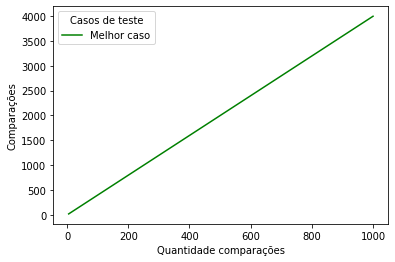

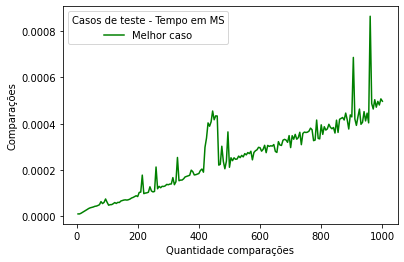

In [253]:
plt.plot(list(melhoresCasosBubbleSort.keys()), list(melhoresCasosBubbleSort.values()),label='Melhor caso',color='green')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(melhoresCasosBubbleSortTempo.keys()), list(melhoresCasosBubbleSortTempo.values()),label='Melhor caso',color='green')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

### Pior caso

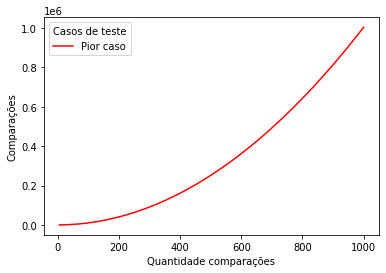

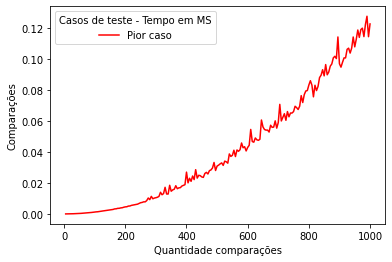

In [254]:
plt.plot(list(pioresCasosSelectionSort.keys()), list(pioresCasosSelectionSort.values()),label='Pior caso',color='red')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(pioresCasosSelectionSortTempo.keys()), list(pioresCasosSelectionSortTempo.values()),label='Pior caso',color='red')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

### Caso aleatório

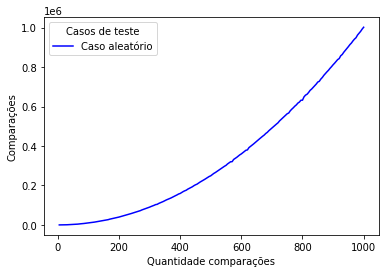

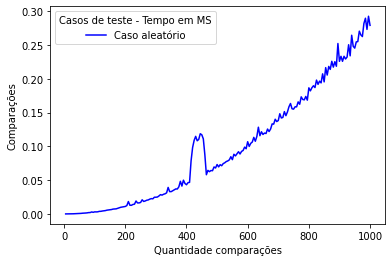

In [255]:
plt.plot(list(casosAleatoriosBubbleSort.keys()), list(casosAleatoriosBubbleSort.values()), label='Caso aleatório',color='blue')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(casosAleatoriosBubbleSortTempo.keys()), list(casosAleatoriosBubbleSortTempo.values()), label='Caso aleatório',color='blue')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

## Questão 1 - A -  Heap Sort

O algoritmo Heap Sort tem como melhor caso o arranjo em ordem decrescente enquanto tem como pior caso ele em ordem crescente

### Geral

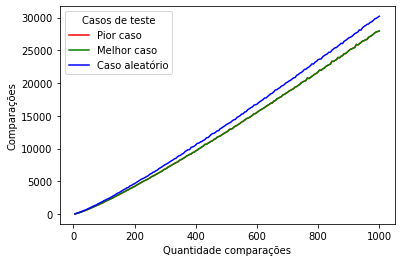

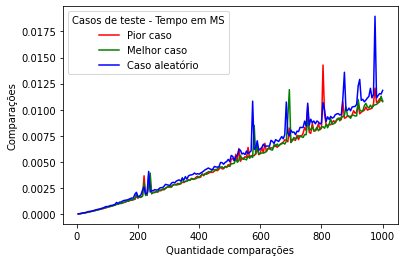

In [256]:
i = 5
melhoresCasosHeapSort = {}
melhoresCasosHeapSortTempo = {}
pioresCasosHeapSort = {}
pioresCasosHeapSortTempo = {}
casosAleatoriosHeapSort = {}
casosAleatoriosHeapSortTempo = {}
while i <= 1000:
  arranjo = np.arange(i)
  arranjoAleatorio = np.random.randint(0,100000,i)
  _,melhoresCasosHeapSort[i],melhoresCasosHeapSortTempo[i] = heapSort(arranjo[::-1])
  _,pioresCasosHeapSort[i],pioresCasosHeapSortTempo[i] = heapSort(arranjo)
  _,casosAleatoriosHeapSort[i],casosAleatoriosHeapSortTempo[i] = heapSort(arranjoAleatorio)
  i += 5

plt.plot(list(pioresCasosHeapSort.keys()), list(pioresCasosHeapSort.values()),label='Pior caso',color='red')
plt.plot(list(melhoresCasosHeapSort.keys()), list(melhoresCasosHeapSort.values()),label='Melhor caso',color='green')
plt.plot(list(casosAleatoriosHeapSort.keys()), list(casosAleatoriosHeapSort.values()), label='Caso aleatório',color='blue')

plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(pioresCasosHeapSortTempo.keys()), list(pioresCasosHeapSortTempo.values()),label='Pior caso',color='red')
plt.plot(list(melhoresCasosHeapSortTempo.keys()), list(melhoresCasosHeapSortTempo.values()),label='Melhor caso',color='green')
plt.plot(list(casosAleatoriosHeapSortTempo.keys()), list(casosAleatoriosHeapSortTempo.values()), label='Caso aleatório',color='blue')

plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

### Melhor Caso

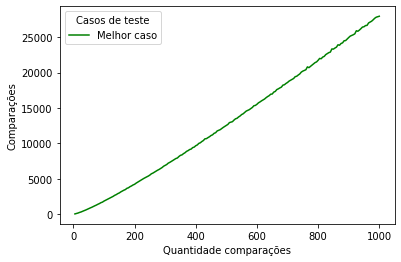

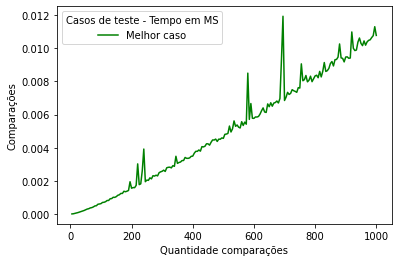

In [257]:
plt.plot(list(melhoresCasosHeapSort.keys()), list(melhoresCasosHeapSort.values()),label='Melhor caso',color='green')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(melhoresCasosHeapSortTempo.keys()), list(melhoresCasosHeapSortTempo.values()),label='Melhor caso',color='green')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

### Pior caso

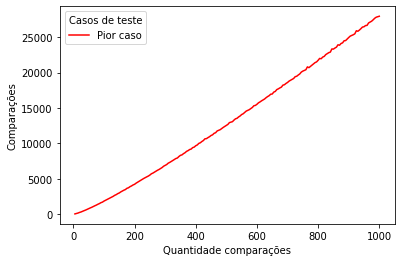

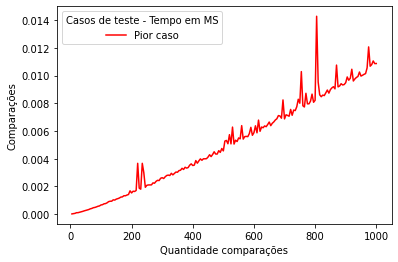

In [258]:
plt.plot(list(pioresCasosHeapSort.keys()), list(pioresCasosHeapSort.values()),label='Pior caso',color='red')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(pioresCasosHeapSortTempo.keys()), list(pioresCasosHeapSortTempo.values()),label='Pior caso',color='red')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

### Caso aleatório

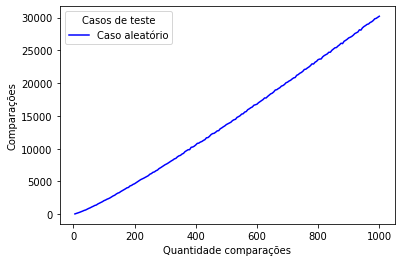

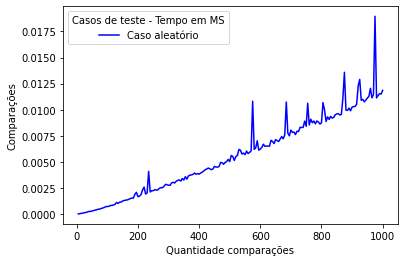

In [259]:
plt.plot(list(casosAleatoriosHeapSort.keys()), list(casosAleatoriosHeapSort.values()), label='Caso aleatório',color='blue')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(casosAleatoriosHeapSortTempo.keys()), list(casosAleatoriosHeapSortTempo.values()), label='Caso aleatório',color='blue')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

## Questão 1 - A - Quick Sort

O algoritmo Quick Sort tem como melhor caso o arranjo desordenado enquanto tem como pior caso o arranjo em ordem ordem crescente

### Geral

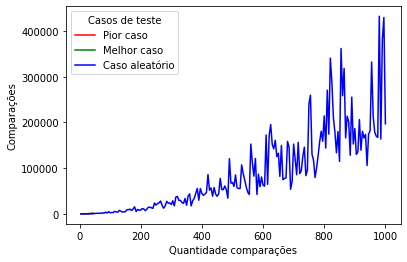

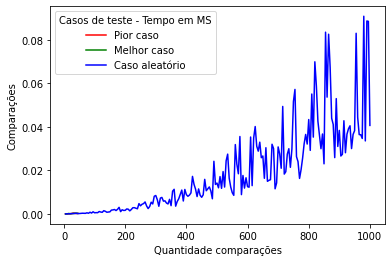

In [260]:
i = 5
melhoresCasosQuickSort = {}
melhoresCasosQuickSortTempo = {}
pioresCasosQuickSort = {}
pioresCasosQuickSortTempo = {}
casosAleatoriosQuickSort = {}
casosAleatoriosQuickSortTempo = {}

while i <= 1000:
  arranjoAleatorio = np.random.randint(0,100000,i)
  casosAleatoriosQuickSort[i], casosAleatoriosQuickSortTempo[i] = quickSortA(arranjoAleatorio)
  if i < 50:
    melhoresCasosQuickSort[i],melhoresCasosQuickSortTempo[i] = quickSortA(arranjoAleatorio)
    pioresCasosQuickSort[i],pioresCasosQuickSortTempo[i] = quickSortA(np.arange(i))
  i += 5

plt.plot(list(pioresCasosQuickSort.keys()), list(pioresCasosQuickSort.values()),label='Pior caso',color='red')
plt.plot(list(melhoresCasosQuickSort.keys()), list(melhoresCasosQuickSort.values()),label='Melhor caso',color='green')
plt.plot(list(casosAleatoriosQuickSort.keys()), list(casosAleatoriosQuickSort.values()), label='Caso aleatório',color='blue')

plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(pioresCasosQuickSortTempo.keys()), list(pioresCasosQuickSortTempo.values()),label='Pior caso',color='red')
plt.plot(list(melhoresCasosQuickSortTempo.keys()), list(melhoresCasosQuickSortTempo.values()),label='Melhor caso',color='green')
plt.plot(list(casosAleatoriosQuickSortTempo.keys()), list(casosAleatoriosQuickSortTempo.values()), label='Caso aleatório',color='blue')

plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

### Melhor Caso

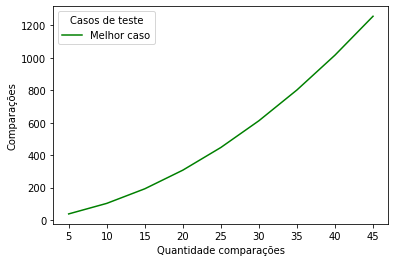

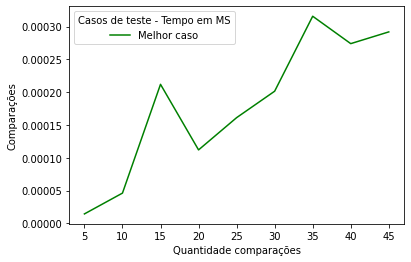

In [261]:
plt.plot(list(melhoresCasosQuickSort.keys()), list(melhoresCasosQuickSort.values()),label='Melhor caso',color='green')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(melhoresCasosQuickSortTempo.keys()), list(melhoresCasosQuickSortTempo.values()),label='Melhor caso',color='green')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

### Pior caso

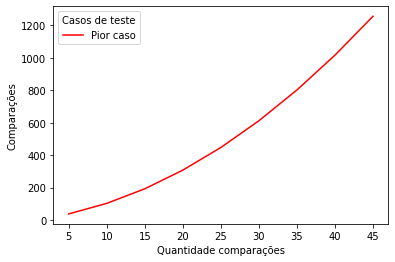

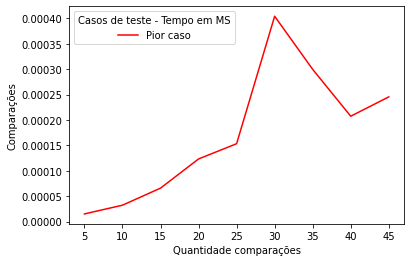

In [262]:
plt.plot(list(pioresCasosQuickSort.keys()), list(pioresCasosQuickSort.values()),label='Pior caso',color='red')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(pioresCasosQuickSortTempo.keys()), list(pioresCasosQuickSortTempo.values()),label='Pior caso',color='red')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

### Caso aleatório

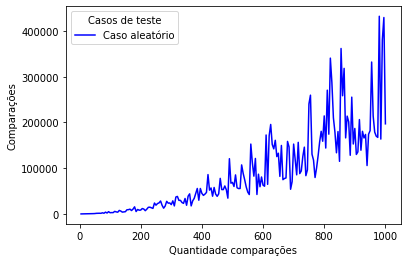

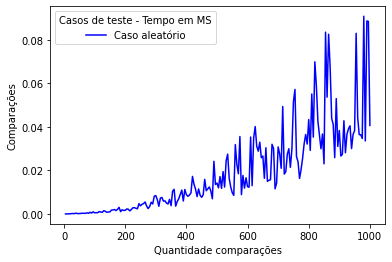

In [263]:
plt.plot(list(casosAleatoriosQuickSort.keys()), list(casosAleatoriosQuickSort.values()), label='Caso aleatório',color='blue')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(casosAleatoriosQuickSortTempo.keys()), list(casosAleatoriosQuickSortTempo.values()), label='Caso aleatório',color='blue')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

## Questão 1 - B


### Melhor Caso

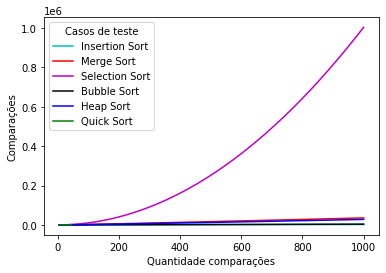

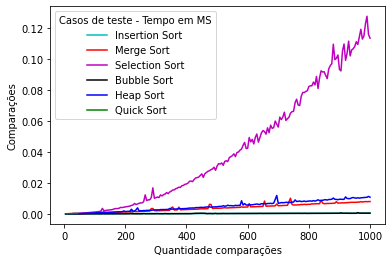

In [264]:
plt.plot(list(melhoresCasosInsertionSort.keys()), list(melhoresCasosInsertionSort.values()),label='Insertion Sort',color='c')
plt.plot(list(melhoresCasosMergeSort.keys()), list(melhoresCasosMergeSort.values()),label='Merge Sort',color='r')
plt.plot(list(melhoresCasosSelectionSort.keys()), list(melhoresCasosSelectionSort.values()),label='Selection Sort',color='m')
plt.plot(list(melhoresCasosBubbleSort.keys()), list(melhoresCasosBubbleSort.values()),label='Bubble Sort',color='k')
plt.plot(list(melhoresCasosHeapSort.keys()), list(melhoresCasosHeapSort.values()),label='Heap Sort',color='b')
plt.plot(list(melhoresCasosQuickSort.keys()), list(melhoresCasosQuickSort.values()),label='Quick Sort',color='g')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(melhoresCasosInsertionSortTempo.keys()), list(melhoresCasosInsertionSortTempo.values()),label='Insertion Sort',color='c')
plt.plot(list(melhoresCasosMergeSortTempo.keys()), list(melhoresCasosMergeSortTempo.values()),label='Merge Sort',color='r')
plt.plot(list(melhoresCasosSelectionSortTempo.keys()), list(melhoresCasosSelectionSortTempo.values()),label='Selection Sort',color='m')
plt.plot(list(melhoresCasosBubbleSortTempo.keys()), list(melhoresCasosBubbleSortTempo.values()),label='Bubble Sort',color='k')
plt.plot(list(melhoresCasosHeapSortTempo.keys()), list(melhoresCasosHeapSortTempo.values()),label='Heap Sort',color='b')
plt.plot(list(melhoresCasosQuickSortTempo.keys()), list(melhoresCasosQuickSortTempo.values()),label='Quick Sort',color='g')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

### Pior Caso

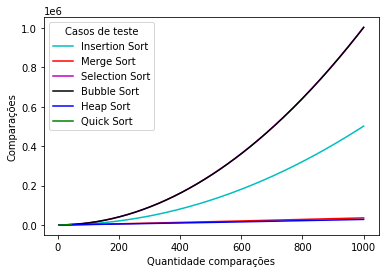

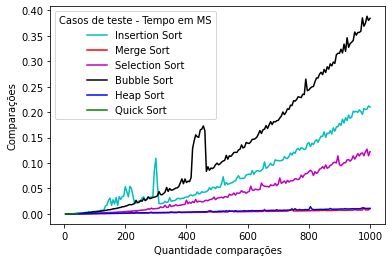

In [265]:
plt.plot(list(pioresCasosInsertionSort.keys()), list(pioresCasosInsertionSort.values()),label='Insertion Sort',color='c')
plt.plot(list(pioresCasosMergeSort.keys()), list(pioresCasosMergeSort.values()),label='Merge Sort',color='r')
plt.plot(list(pioresCasosSelectionSort.keys()), list(pioresCasosSelectionSort.values()),label='Selection Sort',color='m')
plt.plot(list(pioresCasosBubbleSort.keys()), list(pioresCasosBubbleSort.values()),label='Bubble Sort',color='k')
plt.plot(list(pioresCasosHeapSort.keys()), list(pioresCasosHeapSort.values()),label='Heap Sort',color='b')
plt.plot(list(pioresCasosQuickSort.keys()), list(pioresCasosQuickSort.values()),label='Quick Sort',color='g')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(pioresCasosInsertionSortTempo.keys()), list(pioresCasosInsertionSortTempo.values()),label='Insertion Sort',color='c')
plt.plot(list(pioresCasosMergeSortTempo.keys()), list(pioresCasosMergeSortTempo.values()),label='Merge Sort',color='r')
plt.plot(list(pioresCasosSelectionSortTempo.keys()), list(pioresCasosSelectionSortTempo.values()),label='Selection Sort',color='m')
plt.plot(list(pioresCasosBubbleSortTempo.keys()), list(pioresCasosBubbleSortTempo.values()),label='Bubble Sort',color='k')
plt.plot(list(pioresCasosHeapSortTempo.keys()), list(pioresCasosHeapSortTempo.values()),label='Heap Sort',color='b')
plt.plot(list(pioresCasosQuickSortTempo.keys()), list(pioresCasosQuickSortTempo.values()),label='Quick Sort',color='g')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

### Caso aleatório

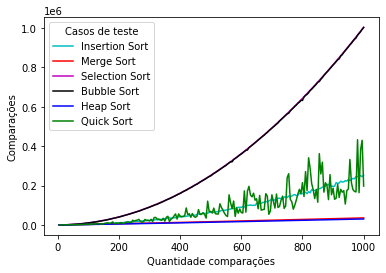

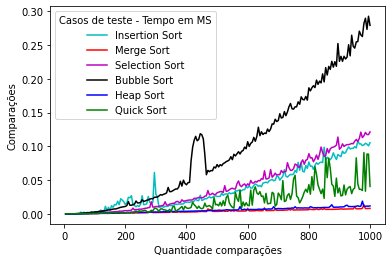

In [266]:
plt.plot(list(casosAleatoriosInsertionSort.keys()), list(casosAleatoriosInsertionSort.values()),label='Insertion Sort',color='c')
plt.plot(list(casosAleatoriosMergeSort.keys()), list(casosAleatoriosMergeSort.values()),label='Merge Sort',color='r')
plt.plot(list(casosAleatoriosSelectionSort.keys()), list(casosAleatoriosSelectionSort.values()),label='Selection Sort',color='m')
plt.plot(list(casosAleatoriosBubbleSort.keys()), list(casosAleatoriosBubbleSort.values()),label='Bubble Sort',color='k')
plt.plot(list(casosAleatoriosHeapSort.keys()), list(casosAleatoriosHeapSort.values()),label='Heap Sort',color='b')
plt.plot(list(casosAleatoriosQuickSort.keys()), list(casosAleatoriosQuickSort.values()),label='Quick Sort',color='g')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.show()

plt.plot(list(casosAleatoriosInsertionSortTempo.keys()), list(casosAleatoriosInsertionSortTempo.values()),label='Insertion Sort',color='c')
plt.plot(list(casosAleatoriosMergeSortTempo.keys()), list(casosAleatoriosMergeSortTempo.values()),label='Merge Sort',color='r')
plt.plot(list(casosAleatoriosSelectionSortTempo.keys()), list(casosAleatoriosSelectionSortTempo.values()),label='Selection Sort',color='m')
plt.plot(list(casosAleatoriosBubbleSortTempo.keys()), list(casosAleatoriosBubbleSortTempo.values()),label='Bubble Sort',color='k')
plt.plot(list(casosAleatoriosHeapSortTempo.keys()), list(casosAleatoriosHeapSortTempo.values()),label='Heap Sort',color='b')
plt.plot(list(casosAleatoriosQuickSortTempo.keys()), list(casosAleatoriosQuickSortTempo.values()),label='Quick Sort',color='g')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.show()

## Questão 1 - C


Seguindo os gráficos gerados pelos algoritmos de ordenação a notação assintótica de cada uma é:

- Insertion Sort
 - Melhor caso: $O(n)$ 
    - Como o laço entra apenas no For e não no while, já que os elementos já estão ordenados, será gerado um $O(n)$ 
 - Pior caso: $O(n^2)$
    - Como todos os itens estão desordenados ele entrará no FOR e no WHILE todas as vezes assim rodará $n^2$
  
 - Caso aleatório: $O(n^2)$
    - Mesmo não rodando todas as vezes o while ainda entrará com uma frequência gerando uma função quadrática $n^2$

- Merge Sort
  - Melhor caso: $\Theta  (n\log n)$
  - Pior caso: $\Theta  (n\log n)$ 
  - Caso aleatório: $\Theta  (n\log n)$
  - O merge sort independe dos dados passados executando sempre uma rotina $T(n)=2∗T(N/2)+N$. 

- Selection Sort
  - Melhor caso: $O(n)$ 
  - Pior caso: $O(n^2)$  
  - Caso aleatório: $O(n^2)$
  - O selection sort executa dois FORs um dentro do outro sempre independente dos dados 
- Bubble Sort
  - Melhor caso: $O(n)$ 
    - Como o laço entra apenas no For e não no while, já que os elementos já estão ordenados, será gerado um $O(n)$ 
 - Pior caso: $O(n^2)$
    - Como todos os itens estão desordenados será feito $\frac{n(n-1)}{2}$ trocas
  
 - Caso aleatório: $O(n^2)$
    - De acordo com os dados gerados no gráfico

- Heap Sort
  - Melhor caso: $\Theta  (n\log n)$
  - Pior caso: $\Theta  (n\log n)$
  - Caso aleatório: $\Theta  (n\log n)$
  - Como o HeapSort independe da entrada sempre ocorrerá a construção do heap  e o ajusto do elemento tendo peso respectivamente de $O(n)$ e $O(\log n)$


- Quick Sort
  - Melhor caso: $O (n\log n)$
    - No melhor caso é formado uma estrutura como uma árvore binária, assim gerando a complexidade de $O (n\log n)$
 - Pior caso: $O(n^2)$
    - No pior caso será feito o máximo de partições, executando $\frac{n(n-1)}{2}$ vezes
  
 - Caso aleatório: $O (n\log n)$
    - Os casos aleatórios ficam mais próximos do melhor caso do que o pior caso, uma vez que é um caso muito específico

#  Questão 2 - Quick Sort Pivô Aleatório
Desenvolva uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



In [267]:
def randomPivotQuickSort(arranjo, inicio, fim):
  tempoInicial = time.time()

  comparacoes = 0

  comparacoes += 1
  if inicio > fim:
    return comparacoes

  anterior = inicio
  posterior = fim
  pivo = np.random.randint(inicio, fim + 1)

  while anterior < posterior:
    comparacoes += 1
    while anterior < posterior and arranjo[posterior] > pivo:
      comparacoes += 1
      posterior = posterior - 1
    comparacoes += 1

    comparacoes += 1
    if anterior < posterior:
      arranjo[anterior] = arranjo[posterior]
      anterior = anterior + 1

    while anterior < posterior and arranjo[anterior] <= pivo:
      comparacoes += 1
      anterior = anterior + 1
    comparacoes += 1
    
    comparacoes += 1
    if anterior < posterior:
      arranjo[posterior] = arranjo[anterior]
      posterior = posterior - 1

    arranjo[anterior] = pivo

  comparacoes += randomPivotQuickSort(arranjo, inicio, anterior - 1)
  comparacoes += randomPivotQuickSort(arranjo, anterior + 1, fim)

  tempoTotal = time.time() - tempoInicial
  return comparacoes

In [268]:
def randomPivotQuickSortA(arranjo):
  tempoInicial = time.time()
  comparacoes = randomPivotQuickSort(arranjo,0,len(arranjo) - 1)
  tempoTotal = time.time() - tempoInicial

  return (comparacoes,tempoTotal)

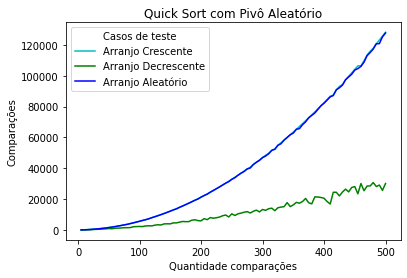

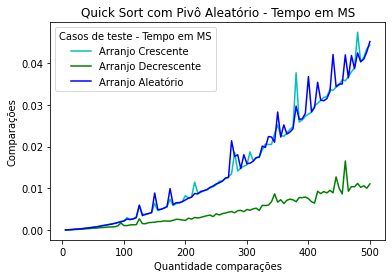

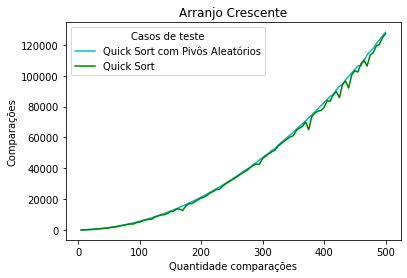

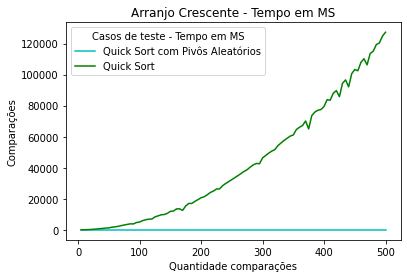

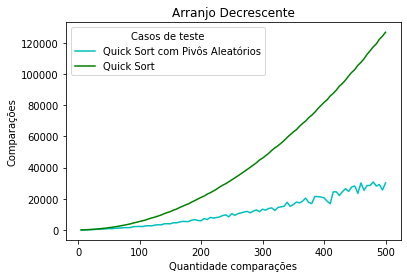

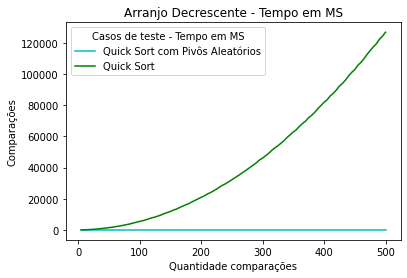

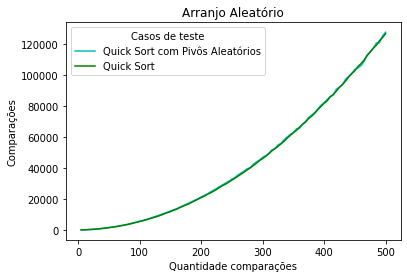

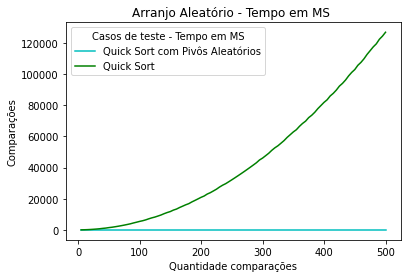

In [269]:
i = 5
crescentesRandomPivotQS = {}
crescentesRandomPivotQSTempo = {}
decrescentesRandomPivotQS = {}
decrescentesRandomPivotQSTempo = {}
casosAleatoriosRandomPivotQS = {}
casosAleatoriosRandomPivotQSTempo = {}

crescentesQuickSort = {}
crescentesQuickSortTempo = {}
decrescentesQuickSort = {}
decrescentesQuickSortTempo = {}
casosAleatoriosQuickSort = {}
casosAleatoriosQuickSortTempo = {}

while i <= 500:
  arranjoAleatorio = np.random.randint(0,100000,i)
  arranjoCrescente = np.sort(arranjoAleatorio)
  arranjoDecrescente = arranjoCrescente[::-1]
  
  casosAleatoriosRandomPivotQS[i],casosAleatoriosRandomPivotQSTempo[i] = randomPivotQuickSortA(arranjoAleatorio)
  crescentesRandomPivotQS[i],crescentesRandomPivotQSTempo[i] = randomPivotQuickSortA(arranjoCrescente)
  decrescentesRandomPivotQS[i],decrescentesRandomPivotQSTempo[i] = randomPivotQuickSortA(arranjoDecrescente)

  casosAleatoriosQuickSort[i],casosAleatoriosQuickSortTempo[i] = quickSortA(arranjoAleatorio)
  crescentesQuickSort[i],crescentesQuickSortTempo[i] = quickSortA(arranjoCrescente)
  decrescentesQuickSort[i],decrescentesQuickSortTempo[i] = quickSortA(arranjoDecrescente)

  i += 5

plt.plot(list(crescentesRandomPivotQS.keys()), list(crescentesRandomPivotQS.values()),label='Arranjo Crescente',color='c')
plt.plot(list(decrescentesRandomPivotQS.keys()), list(decrescentesRandomPivotQS.values()),label='Arranjo Decrescente',color='g')
plt.plot(list(casosAleatoriosRandomPivotQS.keys()), list(casosAleatoriosRandomPivotQS.values()),label='Arranjo Aleatório',color='b')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.title("Quick Sort com Pivô Aleatório")
plt.show()

plt.plot(list(crescentesRandomPivotQSTempo.keys()), list(crescentesRandomPivotQSTempo.values()),label='Arranjo Crescente',color='c')
plt.plot(list(decrescentesRandomPivotQSTempo.keys()), list(decrescentesRandomPivotQSTempo.values()),label='Arranjo Decrescente',color='g')
plt.plot(list(casosAleatoriosRandomPivotQSTempo.keys()), list(casosAleatoriosRandomPivotQSTempo.values()),label='Arranjo Aleatório',color='b')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.title("Quick Sort com Pivô Aleatório - Tempo em MS")
plt.show()

plt.plot(list(crescentesRandomPivotQS.keys()), list(crescentesRandomPivotQS.values()),label='Quick Sort com Pivôs Aleatórios',color='c')
plt.plot(list(crescentesQuickSort.keys()), list(crescentesQuickSort.values()),label='Quick Sort',color='g')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.title("Arranjo Crescente")
plt.show()

plt.plot(list(crescentesRandomPivotQSTempo.keys()), list(crescentesRandomPivotQSTempo.values()),label='Quick Sort com Pivôs Aleatórios',color='c')
plt.plot(list(crescentesQuickSort.keys()), list(crescentesQuickSort.values()),label='Quick Sort',color='g')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.title("Arranjo Crescente - Tempo em MS")
plt.show()

plt.plot(list(decrescentesRandomPivotQS.keys()), list(decrescentesRandomPivotQS.values()),label='Quick Sort com Pivôs Aleatórios',color='c')
plt.plot(list(decrescentesQuickSort.keys()), list(decrescentesQuickSort.values()),label='Quick Sort',color='g')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.title("Arranjo Decrescente")
plt.show()

plt.plot(list(decrescentesRandomPivotQSTempo.keys()), list(decrescentesRandomPivotQSTempo.values()),label='Quick Sort com Pivôs Aleatórios',color='c')
plt.plot(list(decrescentesQuickSort.keys()), list(decrescentesQuickSort.values()),label='Quick Sort',color='g')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.title("Arranjo Decrescente - Tempo em MS")
plt.show()

plt.plot(list(casosAleatoriosRandomPivotQS.keys()), list(casosAleatoriosRandomPivotQS.values()),label='Quick Sort com Pivôs Aleatórios',color='c')
plt.plot(list(casosAleatoriosQuickSort.keys()), list(decrescentesQuickSort.values()),label='Quick Sort',color='g')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste")
plt.title("Arranjo Aleatório")
plt.show()

plt.plot(list(casosAleatoriosRandomPivotQSTempo.keys()), list(casosAleatoriosRandomPivotQSTempo.values()),label='Quick Sort com Pivôs Aleatórios',color='c')
plt.plot(list(casosAleatoriosQuickSort.keys()), list(decrescentesQuickSort.values()),label='Quick Sort',color='g')
plt.xlabel("Quantidade comparações")
plt.ylabel("Comparações")
plt.legend(title="Casos de teste - Tempo em MS")
plt.title("Arranjo Aleatório - Tempo em MS ")
plt.show()

Observando os gráficos, é possível notar que o Quick Sort com os Pivôs aleatórios possuem uma quantidade de comparações semelhantes para arranjos crescentes e decrescentes, sendo melhor no caso de arranjos aleatórios.

Comparando o Quick Sort padrão com o Quick Sort de Pivôs aleatórios, nota se que o número de comparações entre eles são semelhantes nos casos de arranjos crescentes e arranjos aleatórios. O Quick Sort com Pivôs Aleatórios aprensenta ser melhor para os casos de arranjo decrescente. 